3.	Import the required packages with their customary aliases as follows:

In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


4.	Using the pandas `read_csv()` method, read the GDP dataset into your notebook as a DataFrame called `gdp_df`. Take a look at the first few and last few rows to familiarize yourself with what is contained in this dataset.

In [31]:
gdp_df = pd.read_csv('../data/gdp_percapita.csv')
print(gdp_df.head())
print(gdp_df.tail())

  Country or Area  Year        Value  Value Footnotes
0     Afghanistan  2020  1970.560169              NaN
1     Afghanistan  2019  2065.036235              NaN
2     Afghanistan  2018  2033.804389              NaN
3     Afghanistan  2017  2058.400221              NaN
4     Afghanistan  2016  2057.067978              NaN
     Country or Area  Year        Value  Value Footnotes
7171        Zimbabwe  1994  2603.927369              NaN
7172        Zimbabwe  1993  2420.092791              NaN
7173        Zimbabwe  1992  2437.152908              NaN
7174        Zimbabwe  1991  2733.696626              NaN
7175        Zimbabwe  1990  2652.129209              NaN


5. How many rows and columns are in `gdp_df`? What are the data types of each column?

In [32]:
print(gdp_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7176 entries, 0 to 7175
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  7176 non-null   object 
 1   Year             7176 non-null   int64  
 2   Value            7176 non-null   float64
 3   Value Footnotes  0 non-null      float64
dtypes: float64(2), int64(1), object(1)
memory usage: 224.4+ KB
None


6. Drop the `Value Footnotes` column and rename the remaining three to 'Country', 'Year', and 'GDP_Per_Capita'.

In [33]:
gdp_df.drop(columns=["Value Footnotes"], inplace = True)
gdp_df.rename(columns={'Country or Area':'Country','Value':'GDP_Per_Capita'},inplace = True)
gdp_df.head()

,Country,Year,GDP_Per_Capita
0,Afghanistan,2020,1970.560169
1,Afghanistan,2019,2065.036235
2,Afghanistan,2018,2033.804389
3,Afghanistan,2017,2058.400221
4,Afghanistan,2016,2057.067978


7. How many countries have data for all years? Which countries are missing many years of data? Look at the number of observations per year. What do you notice? 

In [34]:
print("the data set has {} rows and {} columns.format".format(gdp_df.shape[0], gdp_df.shape[1]))
count_country = gdp_df.groupby("Country")["Year"].count()
#len(count_country) #242 total countries
#len(count_country[count_country == 31]) #205 countries have data for all years
count_country[count_country!= 31] #37 countries are missing years of data (countries listed out)

##have no observations! if you want to come back to this question

the data set has 7176 rows and 3 columns.format


Country
Afghanistan                  19
Bosnia and Herzegovina       27
Cambodia                     28
Canada                       24
Cayman Islands               15
Croatia                      26
CuraÃ§ao                     21
Djibouti                      8
Estonia                      26
Hungary                      30
Iceland                      26
Israel                       26
Kosovo                       13
Kuwait                       26
Latvia                       26
Liberia                      21
Libya                        22
Lithuania                    26
Maldives                     26
Moldova                      26
Montenegro                   24
Nauru                        17
Other small states           21
Palau                        21
Qatar                        21
San Marino                   24
Serbia                       26
Sint Maarten (Dutch part)    10
Slovak Republic              29
Slovenia                     26
Small states                 24


8. In this question, you're going to create some plots to show the distribution of GDP per capita for the year 2020. Go to the Python Graph Gallery (https://www.python-graph-gallery.com/) and look at the different types of plots under the Distribution section. Create a histogram, a density plot, a boxplot, and a violin plot. What do you notice when you look at these plots? How do the plots compare and what information can you get out of one type that you can't necessarily get out of the others?

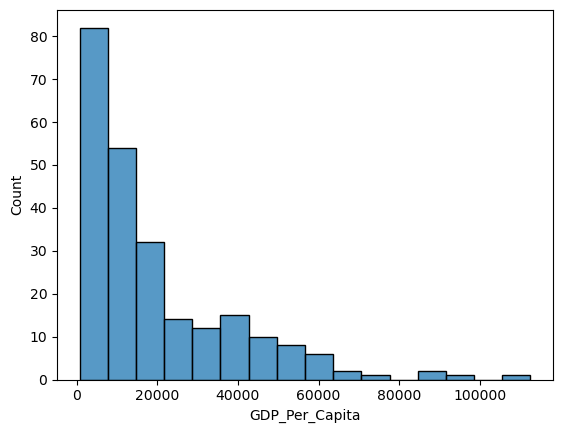

In [53]:
#HISTOGRAM EX
gdp_2020 = gdp_df.loc[gdp_df['Year']==2020]
#print(gdp_2020.head())
sns.histplot(gdp_2020.GDP_Per_Capita)
x = 'GDP_Per_Capita'
y = 'Year'
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

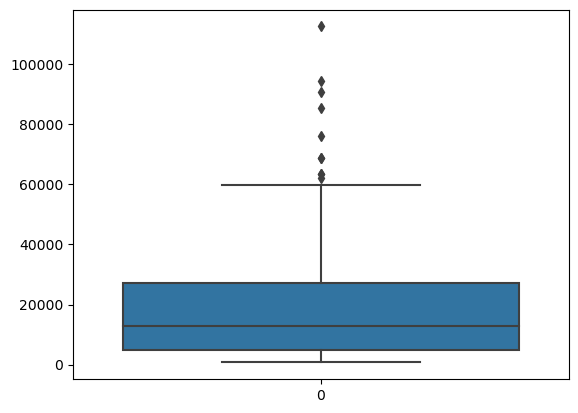

In [45]:
#BoxPlot Ex
sns.boxplot(gdp_2020.GDP_Per_Capita)
plt.show

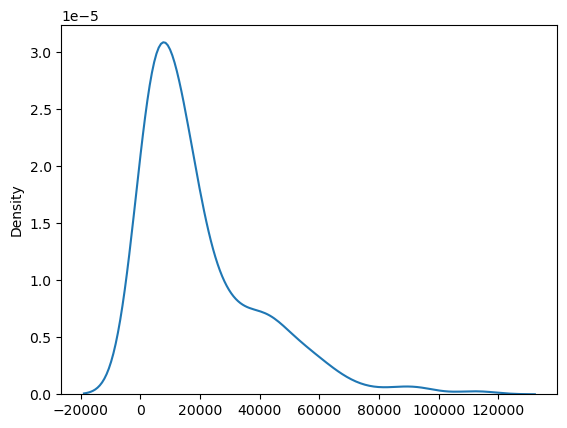

In [46]:
#KDensityPlot Ex
sns.kdeplot(np.array(gdp_2020.GDP_Per_Capita))
plt.show()

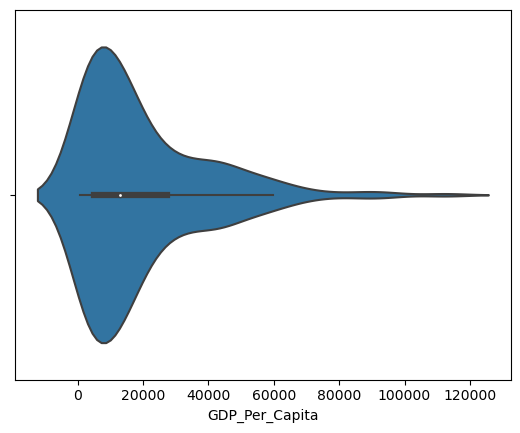

In [48]:
#ViolinPlot Ex
sns.violinplot(x=gdp_2020["GDP_Per_Capita"], data=gdp_2020)
plt.show(block = False)

9. What was the median GDP per capita value in 2020?

In [54]:
gdp_2020['GDP_Per_Capita'].median()
#12908.9374056206

12908.9374056206

10. For this question, you're going to create some visualizations to compare GDP per capita values for the years 1990, 2000, 2010, and 2020. Start by subsetting your data to just these 4 years into a new DataFrame named gdp_decades. Using this, create the following 4 plots:
	* A boxplot
	* A barplot (check out the Barplot with Seaborn section: https://www.python-graph-gallery.com/barplot/#Seaborn)
	* A scatterplot
	* A scatterplot with a trend line overlaid (see this regplot example: https://www.python-graph-gallery.com/42-custom-linear-regression-fit-seaborn)  
Comment on what you observe has happened to GDP values over time and the relative strengths and weaknesses of each type of plot.

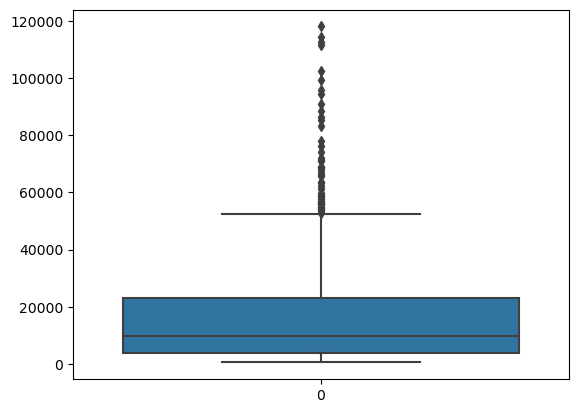

In [59]:
gdp_decades = gdp_df.loc[(gdp_df['Year']==1990)|(gdp_df['Year']==2000)|(gdp_df['Year']==2010)|(gdp_df['Year']==2020)]
sns.boxplot(gdp_decades.GDP_Per_Capita)
plt.show()

C:\Users\cjami\AppData\Local\Temp\ipykernel_11680\1716432759.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


<Axes: xlabel='Year', ylabel='GDP_Per_Capita'>

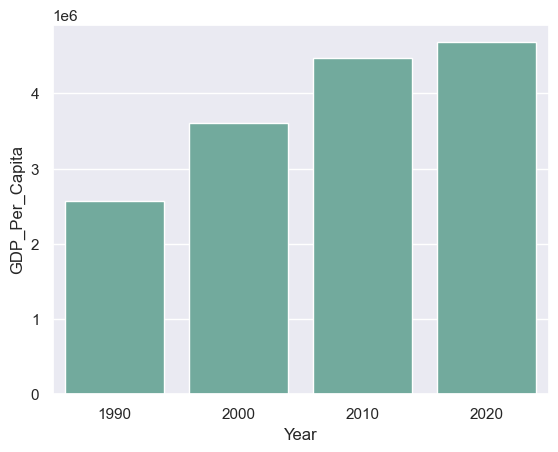

In [66]:
#sns.set(style="darkgrid")

# load dataset
#tips = sns.load_dataset("tips")

# Set the figure size
#plt.figure(figsize=(10, 7))

# plot a bar chart
sns.barplot(
    y="GDP_Per_Capita", 
    x="Year", 
    data=gdp_decades, 
    estimator=sum, 
    ci=None, 
    color='#69b3a2')